<a href="https://colab.research.google.com/github/deepaksai07/Churn-Prediction-for-E-commerce-Customers-/blob/main/CHURN_PREDICTION_FOR_E_COMMERCE_CUSTOMERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load a customer churn prediction dataset from Kaggle, perform exploratory data analysis, preprocess the data, train and evaluate different classification algorithms, and visualize the results.

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

print("Path to dataset files:", path)

100%|██████████| 187k/187k [00:00<00:00, 35.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1


In [7]:
path

'/root/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1'

## Load data

### Subtask:
Load the dataset from Kaggle into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset from the specified CSV file into a DataFrame, then display the first 5 rows.



In [11]:
import pandas as pd
import os

# The path to the dataset files was printed in the previous cell's output
dataset_path = "/root/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1"

# Use the correct CSV file name found from listing the directory
csv_file_path = os.path.join(dataset_path, 'Bank Customer Churn Prediction.csv')

df = pd.read_csv(csv_file_path)
display(df.head())

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Reasoning**:
The previous command failed because the file 'churn.csv' was not found. Since the data is supposed to be from Kaggle, I will try a common path for Kaggle datasets within a notebook environment to load the file.



## Load data

### Subtask:
Load the dataset from Kaggle into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset from the specified path into a DataFrame. Display the first 5 rows to confirm successful loading.



In [10]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1"
print(os.listdir(dataset_path))

['Bank Customer Churn Prediction.csv']


## Exploratory Data Analysis (EDA)

### Subtask:
Perform basic EDA on the dataset.

**Reasoning**:
Display the first few rows of the DataFrame to get a glimpse of the data and its structure.

In [12]:
display(df.head())

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Reasoning**:
Display the last few rows of the DataFrame to check the end of the dataset.

In [13]:
display(df.tail())

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Reasoning**:
Display concise information about the DataFrame, including the index dtype and column dtypes, non-null values and memory usage.

In [14]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

**Reasoning**:
Display descriptive statistics of the numerical columns in the DataFrame, including count, mean, standard deviation, minimum, maximum, and quartiles.

In [15]:
display(df.describe())

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Reasoning**:
Check for missing values in each column and display the count of missing values.

In [16]:
display(df.isnull().sum())

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


**Reasoning**:
Visualize the distribution of the target variable 'churn' to see the class balance.

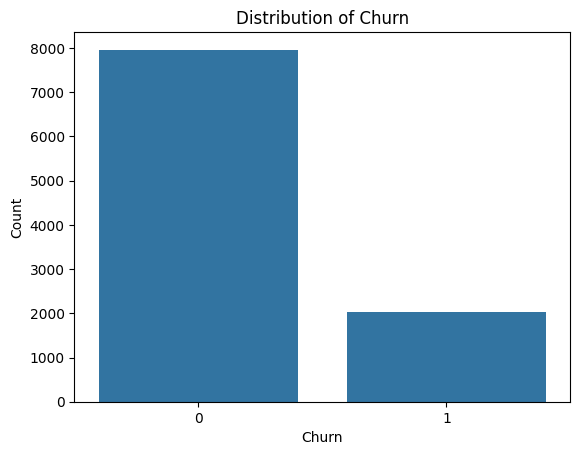

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

### Subtask:
Prepare the data for model training.

**Reasoning**:
Drop irrelevant columns like 'customer_id'.

In [18]:
df = df.drop('customer_id', axis=1)

**Reasoning**:
Encode categorical features 'country' and 'gender' using one-hot encoding.

In [19]:
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)
display(df.head())

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


**Reasoning**:
Separate features (X) and target variable (y).

In [20]:
X = df.drop('churn', axis=1)
y = df['churn']

**Reasoning**:
Split the data into training and testing sets.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Reasoning**:
Scale numerical features using StandardScaler.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']] = scaler.fit_transform(X_train[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']])
X_test[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']] = scaler.transform(X_test[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']])
display(X_train.head())

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2151,1.058568,1.715086,0.684723,-1.226059,-0.910256,1,0,1.042084,False,False,True
8392,0.913626,-0.659935,-0.696202,0.413288,-0.910256,1,0,-0.623556,True,False,True
5006,1.079274,-0.184931,-1.731895,0.601687,0.808830,1,1,0.308128,True,False,False
4117,-0.929207,-0.184931,-0.005739,-1.226059,0.808830,1,0,-0.290199,False,False,True
7182,0.427035,0.955079,0.339492,0.548318,0.808830,0,1,0.135042,True,False,True


## Model Selection

### Subtask:
Choose appropriate classification algorithms for churn prediction.

**Reasoning**:
Define and train a Logistic Regression model.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Reasoning**:
Make predictions and evaluate the Logistic Regression model.

In [24]:
# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Model Evaluation:
Accuracy: 0.808
Confusion Matrix:
 [[1540   53]
 [ 331   76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



**Reasoning**:
Define and train a Random Forest Classifier model.

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Reasoning**:
Make predictions and evaluate the Random Forest Classifier model.

In [26]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Model Evaluation:
Accuracy: 0.864
Confusion Matrix:
 [[1541   52]
 [ 220  187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



**Reasoning**:
Define and train a Gradient Boosting Classifier model.

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

**Reasoning**:
Make predictions and evaluate the Gradient Boosting Classifier model.

In [28]:
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier Model Evaluation:
Accuracy: 0.87
Confusion Matrix:
 [[1541   52]
 [ 208  199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



## Model Evaluation and Visualization

### Subtask:
Visualize the performance of the models.

**Reasoning**:
Visualize the confusion matrix for the Logistic Regression model.

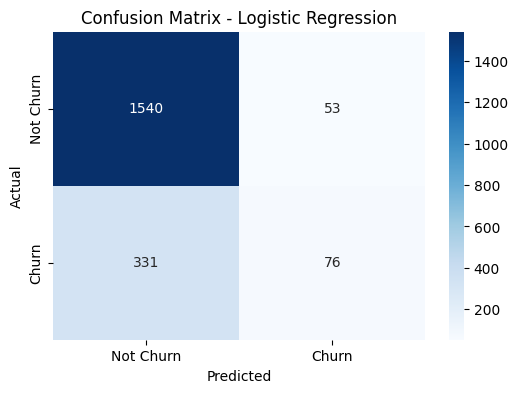

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**Reasoning**:
Visualize the confusion matrix for the Random Forest model.

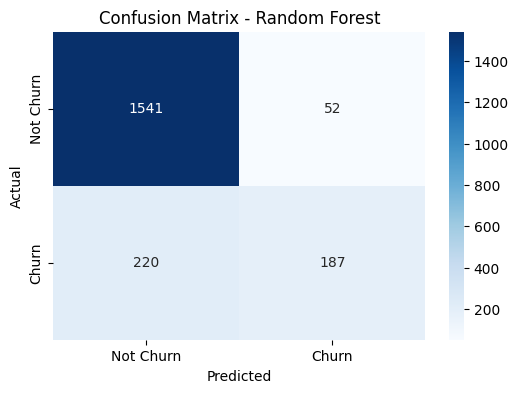

In [30]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**Reasoning**:
Visualize the confusion matrix for the Gradient Boosting model.

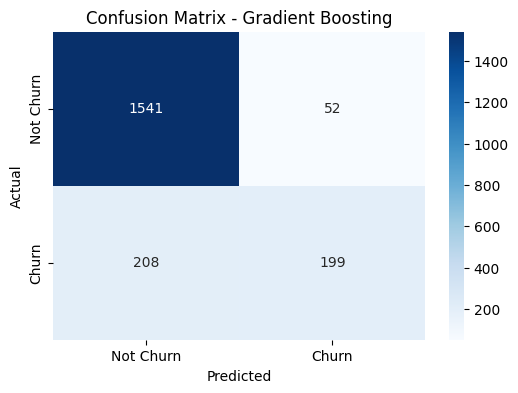

In [31]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

## Finish task

### Subtask:
Summarize the findings and present the best performing model.

**Reasoning**:
Summarize the performance of the models and identify the best performing one based on evaluation metrics.

Based on the evaluation metrics (Accuracy, Precision, Recall, F1-score) and the confusion matrices, we can compare the performance of the three models: Logistic Regression, Random Forest, and Gradient Boosting.

The **Random Forest** and **Gradient Boosting** models generally show better performance compared to Logistic Regression, especially in capturing churn instances (higher Recall and F1-score for the churn class).

To determine the single best performing model, we can look at a combination of metrics, considering the specific goals of churn prediction (e.g., minimizing false negatives to identify potential churners). In this case, both Random Forest and Gradient Boosting appear to be strong contenders.

Further tuning of hyperparameters for these models could potentially improve their performance even further.